In [35]:
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


class ASTVis(ast.NodeVisitor):
    
    def __init__(self):
        self.stack = []
        self.graph = nx.Graph()
        self.labels = dict()
        self.classes = defaultdict(int)
        
        
    def extend(self, node, node_label):
        class_name = node.__class__.__name__
        class_count = self.classes[class_name]
        self.classes[class_name] += 1
        
        node_name = f"{class_name}_{class_count}"
        parent_name = None if not self.stack else self.stack[-1]
        
        self.stack.append(node_name)
        self.graph.add_node(node_name)
        self.labels[node_name] = node_label
        
        if parent_name:
            self.graph.add_edge(parent_name, node_name)
        
        super(self.__class__, self).generic_visit(node)
        self.stack.pop()
        
        
    def generic_visit(self, node):
        label = node.__class__.__name__
        self.extend(node, label)

    
    def visit_FunctionDef(self, node):
        label = f"{node.__class__.__name__}\nname: {node.name}"
        self.extend(node, label)

        
    def visit_arg(self, node):
        label = f"{node.__class__.__name__}\nname: {node.arg}"
        self.extend(node, label)

        
    def visit_Name(self, node):
        label = f"{node.__class__.__name__}\nid: {node.id}"
        self.extend(node, label)

        
    def visit_Constant(self, node):
        label = f"{node.__class__.__name__}\nvalue: {node.value}"
        self.extend(node, label)
        

    def visualize(self, output_path, figsize=(15, 15)):
        plt.figure(1, figsize=figsize)
        nx.draw(self.graph, labels=self.labels, with_labels=True)
        plt.savefig(output_path)
        
        
def show_ast(input_path, output_path, figsize=(15, 15)):
    with open(input_path, 'r') as f:
        code = f.read()
        
    tree = ast.parse(code)
    print(ast.dump(tree, indent=4))
    
    visualizer = ASTVis()
    visualizer.visit(tree)
    visualizer.visualize(output_path)
    
    
if __name__ == "__main__":
    input_path = "fib.py"
    output_path = "artefacts/fib_tree.png"
    figsize = (12, 12)
    show_ast(input_path, output_path, figsize=figsize)

Module(
    body=[
        ImportFrom(
            module='math',
            names=[
                alias(name='sqrt')],
            level=0),
        FunctionDef(
            name='fib',
            args=arguments(
                posonlyargs=[],
                args=[
                    arg(arg='n')],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Assign(
                    targets=[
                        Name(id='phi', ctx=Store())],
                    value=BinOp(
                        left=BinOp(
                            left=Constant(value=1),
                            op=Add(),
                            right=Call(
                                func=Name(id='sqrt', ctx=Load()),
                                args=[
                                    Constant(value=5)],
                                keywords=[])),
                        op=Div(),
                        right=C

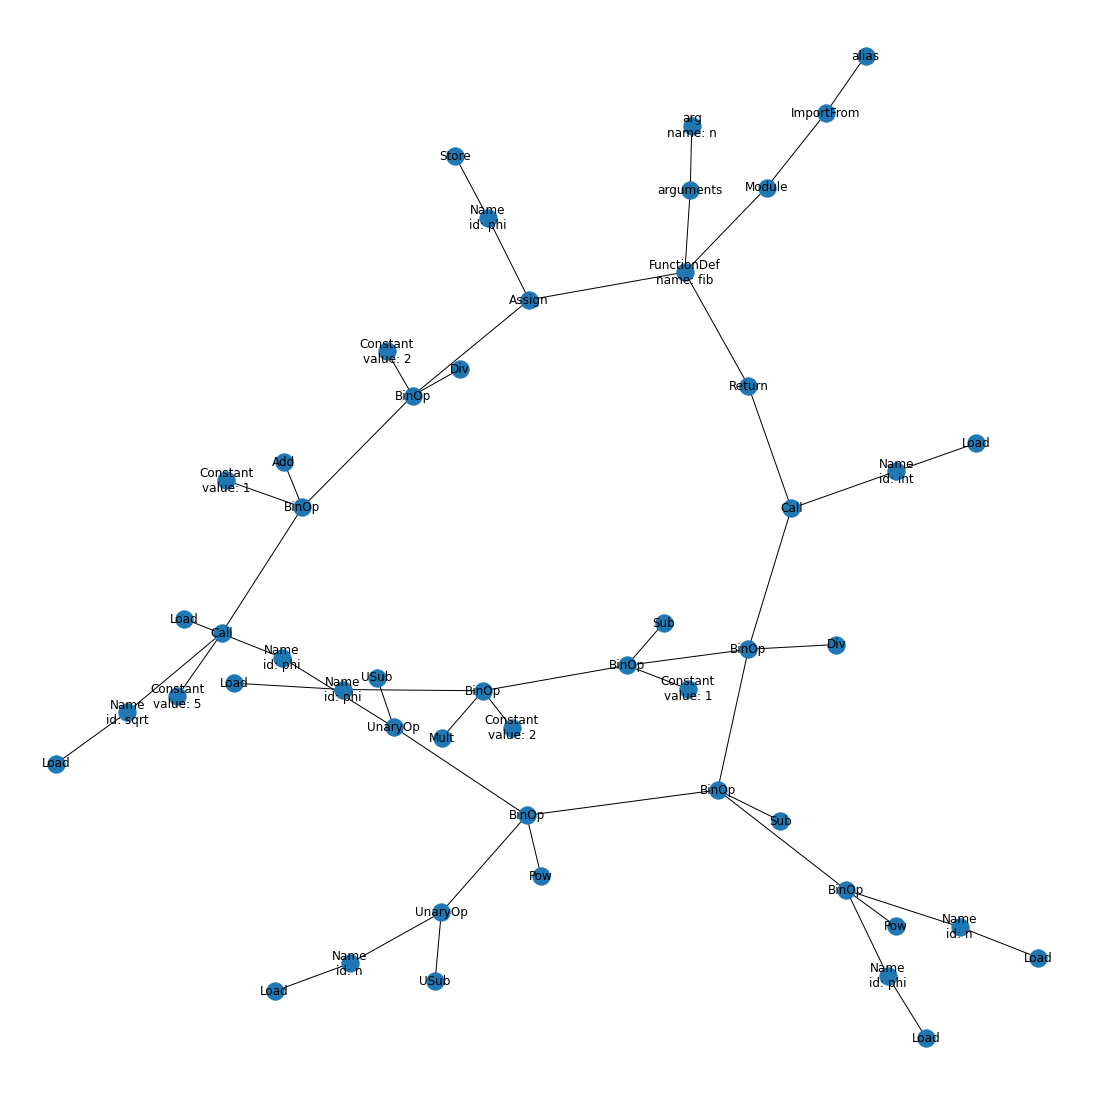

In [36]:
input_path = "fib.py"
output_path = "artefacts/fib_tree.png"
figsize = (12, 12)
show_ast(input_path, output_path, figsize=figsize)